<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MC Simulations

In [ ]:
def ICR(revenue, var, fix, interest_pmt):
    EBIT = revenue * (1-var)-fix
    ICR_calc = EBIT / interest_pmt
    return ICR_calc

In [ ]:
ICR_calc = ICR(10000000, 0.35, 5000000, 500000)

In [ ]:
ICR_calc

3.0

## Distributions

In [ ]:
import numpy as np
from numpy import random

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = random.uniform(2,10, 10000)

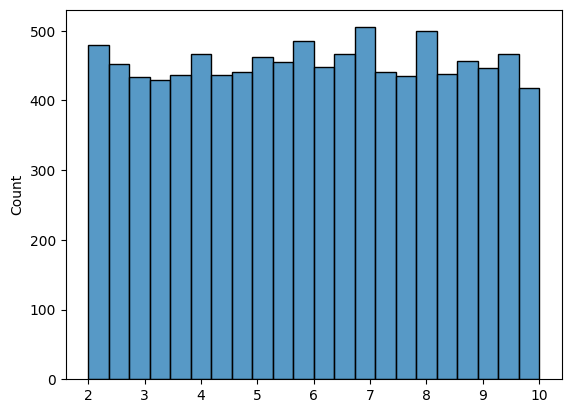

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.normal(100,10, 10000)

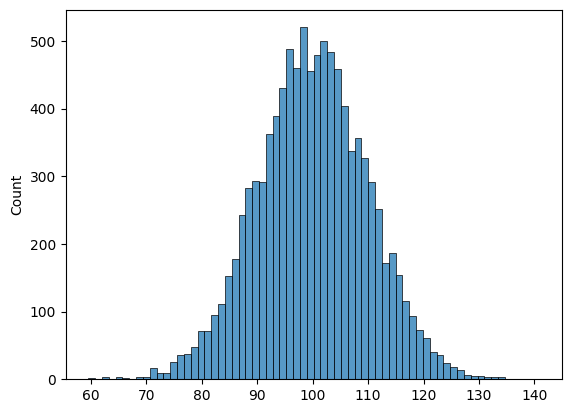

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.lognormal(5,1, 10000)

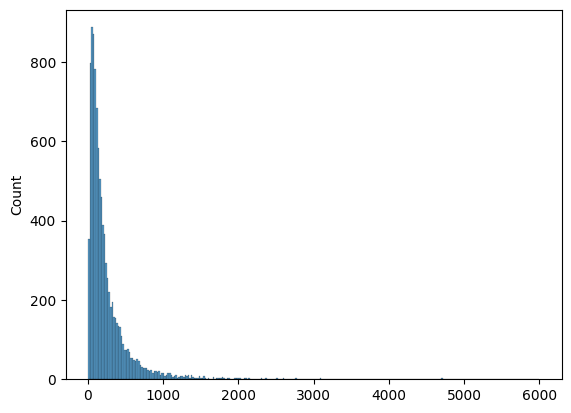

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.lognormal(.10,.05, 10000)

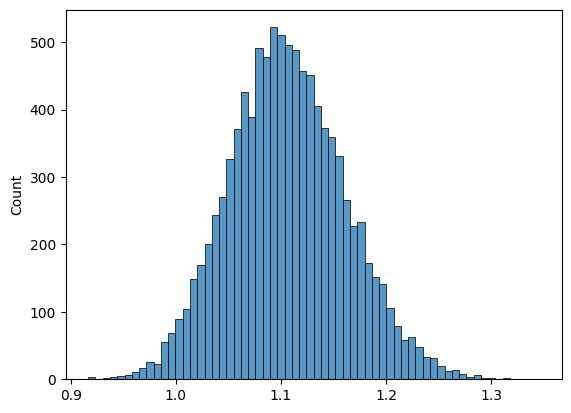

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.normal(.10,.05, 10000)

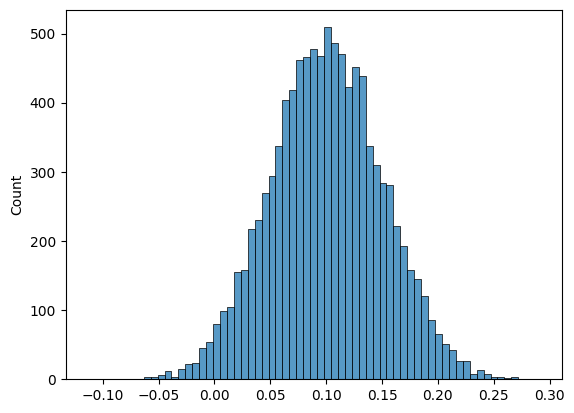

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.poisson(8, 10000)

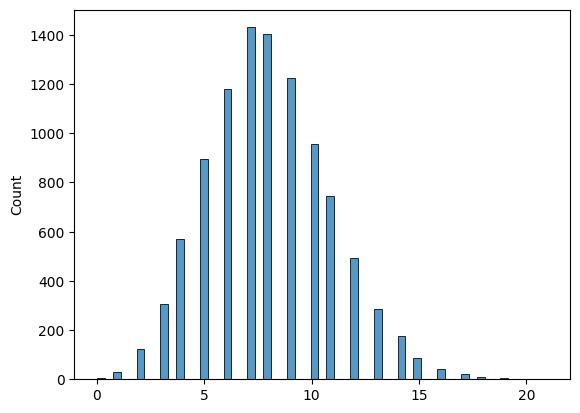

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.beta(0.5, 0.5, 10000)

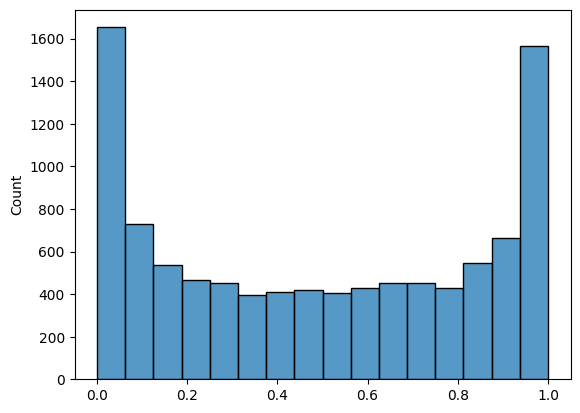

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.beta(2, 2, 10000)

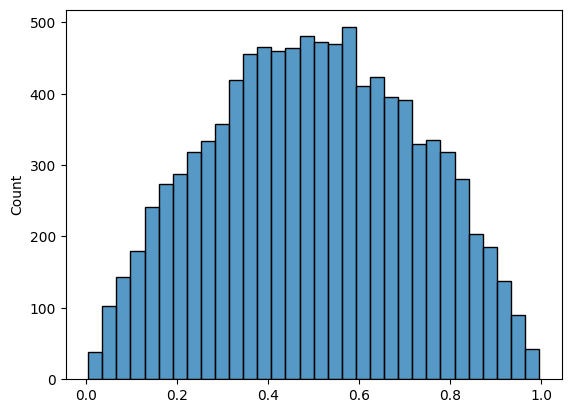

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.beta(2, 4, 10000)

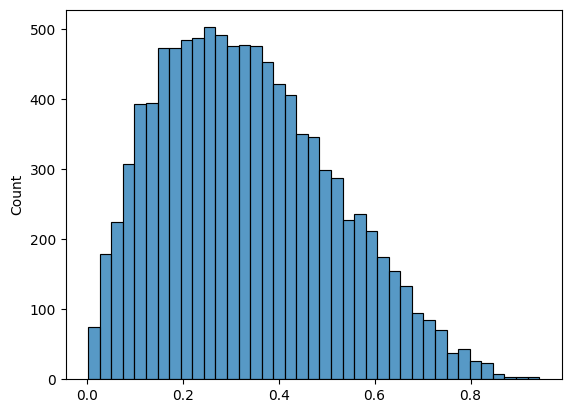

In [ ]:
sns.histplot(x)
plt.show()

In [ ]:
x = random.beta(4, 2, 10000)

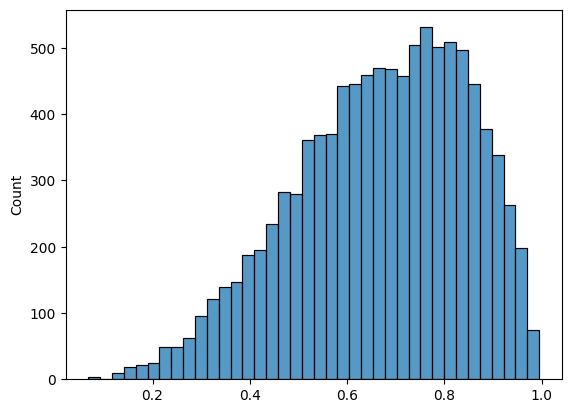

In [ ]:
sns.histplot(x)
plt.show()

## MC Sim in Practice

In [ ]:
rev = random.normal(10000000, 1000000)

In [ ]:
rev

9788130.29952389

In [ ]:
var_rate = random.uniform(0.28, 0.42)

In [ ]:
var_rate

0.32784641506311474

In [ ]:
ICR_calc = ICR(rev, var_rate, 5000000, 500000)

In [ ]:
ICR_calc

3.158253741308663

In [ ]:
import pandas as pd

In [ ]:
ICR_x = []

In [ ]:
for x in range(10000):
  rev = random.normal(10000000, 1000000)
  var_rate = random.uniform(0.28, 0.42)
  ICR_calc = ICR(rev, var_rate, 5000000, 500000)
  ICR_x.append([ICR_calc, rev, var_rate])

In [ ]:
ICR_table = pd.DataFrame(ICR_x, columns=["ICR", "rev", "var"])

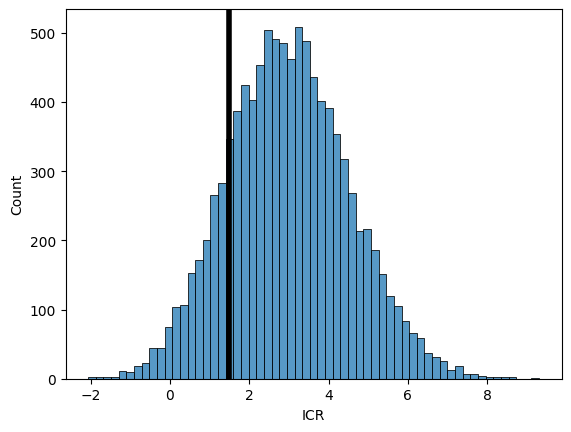

In [ ]:
sns.histplot(ICR_table["ICR"])
plt.axvline(x=1.5, color="black", linewidth=4)
plt.show()

In [ ]:
ICR_table["ICR"][ICR_table["ICR"] > 1.5].count() / 10000

0.8319

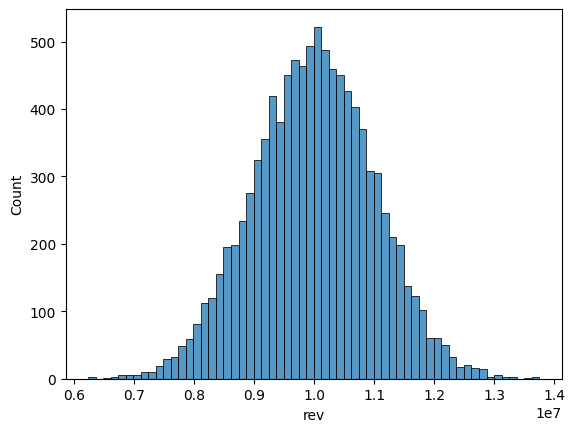

In [ ]:
sns.histplot(ICR_table["rev"])
plt.show()

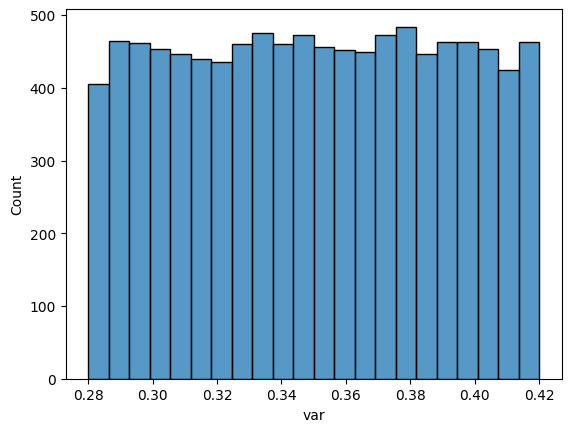

In [ ]:
sns.histplot(ICR_table["var"])
plt.show()

## Queueing

### Single Server Model

In [ ]:
import pandas as pd

In [ ]:
def singleserve(lamb, mu):
  P_0 = 1- (lamb/mu)
  L_q = pow(lamb, 2) / (mu*(mu-lamb))
  L = L_q + (lamb / mu)
  W_q = L_q / lamb
  W = W_q + 1/mu
  P_w = lamb / mu
  return P_0, L_q, L, W_q, W, P_w

In [ ]:
def singlserveprob(lamb, mu, n):
  n_prob = []
  for i in n:
      P_n = pow((lamb / mu), i) * P_0
      n_prob.append([i, P_n])
  n_prob = pd.DataFrame(n_prob, columns=["n", "Prob"])
  return n_prob

In [ ]:
lamb = 0.6
mu = 0.9
n= (0, 1, 2, 3, 4, 5, 6)

In [ ]:
P_0, L_q, L, W_q, W, P_w = singleserve(lamb, mu)

In [ ]:
singlemod = {"Prob Idle": P_0, "Avg Unit Que": L_q, "Avg Unit Sys": L, "Avg Time Que": W_q, "Avg Time Sys": W, "Prob Wait":P_w}

In [ ]:
singlemod

{'Prob Idle': 0.33333333333333337,
 'Avg Unit Que': 1.3333333333333328,
 'Avg Unit Sys': 1.9999999999999996,
 'Avg Time Que': 2.2222222222222214,
 'Avg Time Sys': 3.3333333333333326,
 'Prob Wait': 0.6666666666666666}

In [ ]:
n_prob = singlserveprob(lamb, mu, n)

In [ ]:
n_prob

,n,Prob
0,0,0.333333
1,1,0.222222
2,2,0.148148
3,3,0.098765
4,4,0.065844
5,5,0.043896
6,6,0.029264


## Multiple Server Model

In [ ]:
import pandas as pd
import math

In [ ]:
def multiserve(lamb, mu, k):
  P_0 = 1 / (sum((pow((lamb/mu),x)/math.factorial(x))  + ((pow((lamb/mu),k)/math.factorial(k))*((k*mu)/(k*mu-lamb))) for x in range(0, k)))
  L_q = (pow((lamb/mu),k)*lamb*mu)/(math.factorial(k-1)*(pow((k*mu-lamb),2)))*P_0
  L = L_q + (lamb / mu)
  W_q = L_q / lamb
  W = W_q + 1/mu
  P_w = (1/math.factorial(k))*(pow((lamb/mu),k))*((k*mu)/(k*mu-lamb))*P_0
  return P_0, L_q, L, W_q, W, P_w

In [ ]:
def multiserveprob(lamb, mu, k, n):
  n_prob = []
  for i in n:
      if i <= k:
          P_n = pow((lamb / mu), i) / math.factorial(i) * P_0
      else:
           P_n = pow((lamb / mu), i) / (math.factorial(k)*pow(k,(i-k))) * P_0
      n_prob.append([i, P_n])
  n_prob = pd.DataFrame(n_prob, columns=["n", "Prob"])
  return n_prob

In [ ]:
lamb = 0.6
mu = 0.9
n= (0, 1, 2, 3, 4, 5, 6)
k = 2

In [ ]:
P_0, L_q, L, W_q, W, P_w = multiserve(lamb, mu, k)

In [ ]:
multimod = {"Prob Idle": P_0, "Avg Unit Que": L_q, "Avg Unit Sys": L, "Avg Time Que": W_q, "Avg Time Sys": W, "Prob Wait":P_w}

In [ ]:
multimod

{'Prob Idle': 0.4285714285714286,
 'Avg Unit Que': 0.07142857142857141,
 'Avg Unit Sys': 0.738095238095238,
 'Avg Time Que': 0.11904761904761903,
 'Avg Time Sys': 1.2301587301587302,
 'Prob Wait': 0.14285714285714285}

In [ ]:
n_prob = multiserveprob(lamb, mu, k, n)

In [ ]:
n_prob

,n,Prob
0,0,0.428571
1,1,0.285714
2,2,0.095238
3,3,0.031746
4,4,0.010582
5,5,0.003527
6,6,0.001176


### Selecting Number of Servers

In [ ]:
lamb = 0.6
mu = 0.9

In [ ]:
c_w = 35
c_s = 15

In [ ]:
k = (1, 2, 3, 4, 5, 6)

In [ ]:
k_TC = []

In [ ]:
 for i in k:
    if i > 1:
        P_0, L_q, L, W_q, W, P_w = multiserve(lamb, mu, i)
    else:
        P_0, L_q, L, W_q, W, P_w = singleserve(lamb, mu)

    TC = c_w*L + c_s*i
    k_TC.append([TC, c_w*L, c_s*i])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
k_TC_tab = pd.DataFrame(k_TC, columns=["TC", "wait", "serv"])

In [ ]:
k_TC_tab

,TC,wait,serv
0,85.000000,70.000000,15
1,55.833333,25.833333,30
2,68.638677,23.638677,45
3,83.368290,23.368290,60
4,98.336825,23.336825,75
5,113.333641,23.333641,90


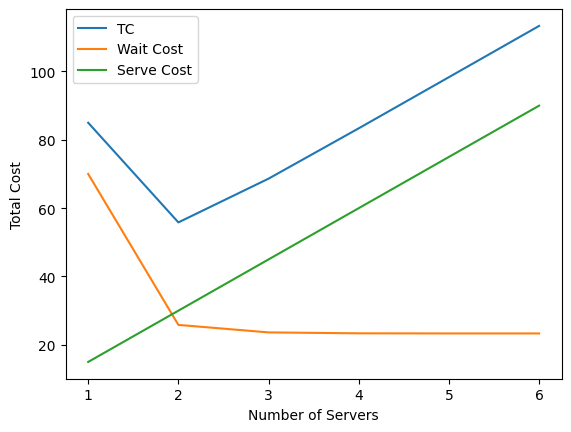

In [ ]:
plt.plot(k, k_TC_tab["TC"])
plt.plot(k, k_TC_tab["wait"])
plt.plot(k, k_TC_tab["serv"])
plt.locator_params(axis="both", integer=True, tight=True)
plt.ylabel("Total Cost")
plt.xlabel("Number of Servers")
plt.legend(["TC", "Wait Cost", "Serve Cost"])
plt.show()

### Finite Population

In [ ]:
import pandas as pd
import math

In [ ]:
def singleserve_fin(lamb, mu, N):
  P_0 = 1 / sum((math.factorial(N)/math.factorial(N-x))*(pow((lamb / mu), x)) for x in range(0, N+1))
  L_q = N - (((lamb + mu)/lamb)*(1-P_0))
  L = L_q + (1-P_0)
  W_q = L_q / ((N-L)*lamb)
  W = W_q + 1/mu
  P_w = 1 - P_0
  return P_0, L_q, L, W_q, W, P_w

In [ ]:
def singlserveprob_fin(lamb, mu, n, N):
  n_prob = []
  for i in n:
      P_n = (math.factorial(N)/math.factorial(N-i))*pow((lamb / mu), i) * P_0
      n_prob.append([i, P_n])
  n_prob = pd.DataFrame(n_prob, columns=["n", "Prob"])
  return n_prob

In [ ]:
lamb = 1
mu = 2
n= (0, 1, 2, 3, 4, 5, 6, 7, 9, 10)
N = 10

In [ ]:
P_0, L_q, L, W_q, W, P_w = singleserve_fin(lamb, mu, N)

In [ ]:
singlemod = {"Prob Idle": P_0, "Avg Unit Que": L_q, "Avg Unit Sys": L, "Avg Time Que": W_q, "Avg Time Sys": W, "Prob Wait":P_w}

singlemod

{'Prob Idle': 3.819016794126352e-05,
 'Avg Unit Que': 7.000114570503824,
 'Avg Unit Sys': 8.000076380335882,
 'Avg Time Que': 3.5001909581324284,
 'Avg Time Sys': 4.000190958132428,
 'Prob Wait': 0.9999618098320587}

In [ ]:
n_prob = singlserveprob_fin(lamb, mu, n, N)

n_prob

,n,Prob
0,0,0.000038
1,1,0.000191
2,2,0.000859
3,3,0.003437
4,4,0.012030
5,5,0.036090
6,6,0.090224
7,7,0.180449
8,9,0.270673
9,10,0.135336


### Arbitrary Service Time

In [ ]:
import pandas as pd

In [ ]:
def singleserve_arb(lamb, mu, sigma):
  P_0 = 1- (lamb/mu)
  L_q = ((pow(lamb, 2)*pow(sigma, 2))+ pow((lamb / mu), 2))/ (2*(1-(lamb / mu)))
  L = L_q + (lamb / mu)
  W_q = L_q / lamb
  W = W_q + 1/mu
  P_w = lamb / mu
  return P_0, L_q, L, W_q, W, P_w

In [ ]:
lamb = 3
mu = 6
sigma = 1.5

In [ ]:
P_0, L_q, L, W_q, W, P_w = singleserve_arb(lamb, mu, sigma)

In [ ]:
singlemod = {"Prob Idle": P_0, "Avg Unit Que": L_q, "Avg Unit Sys": L, "Avg Time Que": W_q, "Avg Time Sys": W, "Prob Wait":P_w}

In [ ]:
singlemod

{'Prob Idle': 0.5,
 'Avg Unit Que': 20.5,
 'Avg Unit Sys': 21.0,
 'Avg Time Que': 6.833333333333333,
 'Avg Time Sys': 7.0,
 'Prob Wait': 0.5}

### Constant Service Time

In [ ]:
import pandas as pd

In [ ]:
lamb = 3
mu = 6

In [ ]:
def singleserve_con(lamb, mu):
  P_0 = 1- (lamb/mu)
  L_q = (pow((lamb / mu), 2))/ (2*(1-(lamb / mu)))
  L = L_q + (lamb / mu)
  W_q = L_q / lamb
  W = W_q + 1/mu
  P_w = lamb / mu
  return P_0, L_q, L, W_q, W, P_w

In [ ]:
P_0, L_q, L, W_q, W, P_w = singleserve_con(lamb, mu)

In [ ]:
singlemod = {"Prob Idle": P_0, "Avg Unit Que": L_q, "Avg Unit Sys": L, "Avg Time Que": W_q, "Avg Time Sys": W, "Prob Wait":P_w}

In [ ]:
singlemod

{'Prob Idle': 0.5,
 'Avg Unit Que': 0.25,
 'Avg Unit Sys': 0.75,
 'Avg Time Que': 0.08333333333333333,
 'Avg Time Sys': 0.25,
 'Prob Wait': 0.5}

### No Waiting

In [ ]:
import pandas as pd
import math

In [ ]:
def multiserveprob(lamb, mu, k):
  n_prob = []
  for j in range(0,k+1):
      P_n = (pow((lamb / mu), j) / math.factorial(j)) / sum((pow((lamb / mu), x) / math.factorial(x)) for x in range(0, k+1))
      n_prob.append([j, P_n])
  n_prob = pd.DataFrame(n_prob, columns=["n", "Prob"])
  return n_prob

In [ ]:
lamb = 3
mu = 6
k= 2

In [ ]:
n_prob = multiserveprob(lamb, mu, k)

n_prob

,n,Prob
0,0,0.615385
1,1,0.307692
2,2,0.076923


In [ ]:
P_k = n_prob["Prob"]

In [ ]:
L = (lamb / mu)*(1-P_k)

In [ ]:
L

0    0.192308
1    0.346154
2    0.461538
Name: Prob, dtype: float64